#### Library and Data Preparation 

In [1]:
import numpy as np

from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile
from sklearn.decomposition import PCA

# %matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
!wget "https://nlp.stanford.edu/data/glove.6B.zip"
!unzip glove.6B.zip

--2023-06-01 15:14:15--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-06-01 15:14:16--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2023-06-01 15:16:55 (5.16 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflatin

#### Loading Glove and Word2Vec File

In [3]:
glove_file = datapath("/content/glove.6B.300d.txt")
word2vec_glove_file = get_tmpfile("glove.6B.300d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

<ipython-input-3-902804a7f282>:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 300)

#### Word2Vec Model

In [4]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

#### Similar and Unsimilar Words

In [5]:
model.most_similar('obama')

[('barack', 0.9254721999168396),
 ('mccain', 0.7590768337249756),
 ('bush', 0.7570988535881042),
 ('clinton', 0.7085603475570679),
 ('hillary', 0.6497915387153625),
 ('kerry', 0.6144053339958191),
 ('rodham', 0.6138635277748108),
 ('biden', 0.5940852165222168),
 ('gore', 0.5885976552963257),
 ('democrats', 0.5608304738998413)]

In [6]:
model.most_similar('banana')

[('bananas', 0.6691170930862427),
 ('mango', 0.5804104208946228),
 ('pineapple', 0.5492372512817383),
 ('coconut', 0.5462778806686401),
 ('papaya', 0.541056752204895),
 ('fruit', 0.52181077003479),
 ('growers', 0.4877638816833496),
 ('nut', 0.48399588465690613),
 ('peanut', 0.48062023520469666),
 ('potato', 0.48061180114746094)]

In [7]:
model.most_similar(negative='banana')

[('kasson', 0.30769410729408264),
 ('boling', 0.3042016923427582),
 ('hazmi', 0.2930523157119751),
 ('fadli', 0.2912213206291199),
 ('bhatnagar', 0.29037898778915405),
 ('patner', 0.28239113092422485),
 ('nessler', 0.2814348042011261),
 ('kj/mol', 0.2788812518119812),
 ('mphasis', 0.2779490649700165),
 ('pattanaik', 0.2779349088668823)]

#### Words Analogy

In [8]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.6713


In [9]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [10]:
analogy('japan', 'japanese', 'australia')

'australian'

In [11]:
analogy('australia', 'beer', 'france')

'champagne'

In [12]:
analogy('obama', 'clinton', 'reagan')

'ronald'

In [13]:
analogy('tall', 'tallest', 'long')

'longest'

In [14]:
analogy('good', 'fantastic', 'bad')

'horrible'

In [15]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


#### Representation of 2-dimensional Words

In [16]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.index_to_key), sample)
        else:
            words = [word for word in model.index_to_key]

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:, :2]
    
    plt.figure(figsize=(6, 6))
    plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x + 0.05, y + 0.05, word)
    plt.show()

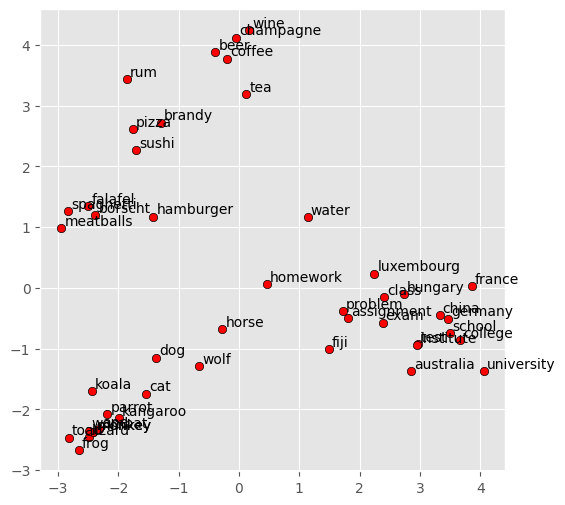

In [17]:
lst = ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water', 'spaghetti', 'borscht', 'hamburger', 
       'pizza', 'falafel', 'sushi', 'meatballs', 'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard', 'frog', 
       'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf', 'france', 'germany', 'hungary', 'luxembourg', 'australia', 
       'fiji', 'china', 'homework', 'assignment', 'problem', 'exam', 'test', 'class', 'school', 'college', 
       'university', 'institute']

display_pca_scatterplot(model, lst)

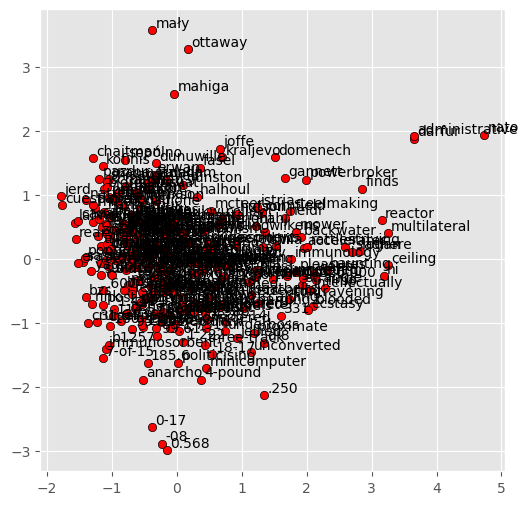

In [18]:
display_pca_scatterplot(model, sample=300)